# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Цель исследования
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
# Особенности отрасли и данных

У предоставленных данных есть две особенности:
1) Одна часть данных была занесена конечными пользователями системы, т.е арендодателями. 

2) Вторая часть данных заносится в систему автоматически (в таких столбцах как: расстояния от, дата публикации)

# План исследования
Шаг 1. Изучить общую информацию
    
    1. Загрузить данные из файла в датафрейм.
    
    2. Изучить общую информацию о полученном датафрейме.
    
    3. Построить общую гистограмму для всех числовых столбцов таблицы. 
   
Шаг 2. Предобработка данных

    1. Найти и изучить пропущенные значения в столбцах
    
    2. Рассмотрите типы данных в каждом столбце
    
    3. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты
    
    4. Найти и устранить редкие и выбивающиеся значения

Шаг 3. Добавить в таблицу новые столбцы со следующими параметрами

    1. цена одного квадратного метра;

    2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

    3. месяц публикации объявления;
    
    4. год публикации объявления;

    5. тип этажа квартиры (значения — «‎первый», «последний», «другой»);

    6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
    
Шаг 4. Провести исследовательский анализ данных

    1. Изучить следующие параметры объектов:
    
        общая площадь;
    
        жилая площадь;
    
        площадь кухни;

        цена объекта;

        количество комнат;

        высота потолков;

        этаж квартиры;

        тип этажа квартиры («первый», «последний», «другой»);

        общее количество этажей в доме;

        расстояние до центра города в метрах;

        расстояние до ближайшего аэропорта;

        расстояние до ближайшего парка;

        день и месяц публикации объявления.

        Построить отдельные гистограммы для каждого из этих параметров. 
        
     2. Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
     
        Построить гистограмму.

        Посчитать среднее и медиану.
        
        описать, сколько времени обычно занимает продажа. Описать, какие продажи можно считать быстрыми, а какие — необычно долгими.
        
     3. Описать, какие факторы больше всего влияют на общую (полную) стоимость объекта.
 
        Изучить, зависит ли цена от:
     
        общей площади;
    
        жилой площади;
        
        площади кухни;
        
        количества комнат;
        
        этажа, на котором расположена квартира (первый, последний, другой);
    
        даты размещения (день недели, месяц, год).
        
        Построить графики, которые покажут зависимость цены от указанных выше параметров. 
        
     4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
     
     5. Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.
     
     
Шаг 5. Написать общий вывод

### Загрузка данных. 

#### Импортирование библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Загрузка данных

**Прочитаем файл cvs и сохраним в переменной data**

In [2]:
data = pd.read_csv('C:/Users/Max/Desktop/Каталог/Блокноты/Дневники/Компьютер/Д_программирования/Python/Data_Science/Мои_проекты/Проект_3/real_estate_data.csv', sep='\t')

#### Первичный анализ данных

**Выведем первые 10 строк базы**

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведем информацию о базе**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

База содержит 22 столбца и 23699 строк. 

    ceiling_height (Высота потолков) 
    floors_total (всего этажей в доме)
    living_area (жилая площадь в квадратных метрах)
    is_apartment (апартаменты)
    kitchen_area (площадь кухни в квадратных метрах)
    balcony (число балконов)
    locality_name (название населённого пункта)
    airports_nearest - (расстояние до ближайшего аэропорта в метрах (м)) 
    cityCenters_nearest (расстояние до центра города (м))
    parks_around3000 (число парков в радиусе 3 км)
    parks_nearest (расстояние до ближайшего парка (м))
    ponds_around3000 (число водоёмов в радиусе 3 км)
    ponds_nearest (расстояние до ближайшего водоёма (м))
    days_exposition (сколько дней было размещено объявление (от публикации до снятия))




Видим, что некоторые столбцы имеют пропуски. Потребуется их заполнить или удалить.

Некоторые столбцы имеют некорректный тип данных. Нужно будет поменять формат.

Потребуется проверка на неявные дубликаты столбца locality_name.

Потрубуется сделать проверку на явные дубликаты.

**Построим гистрограммы для столбцов из базы данных**

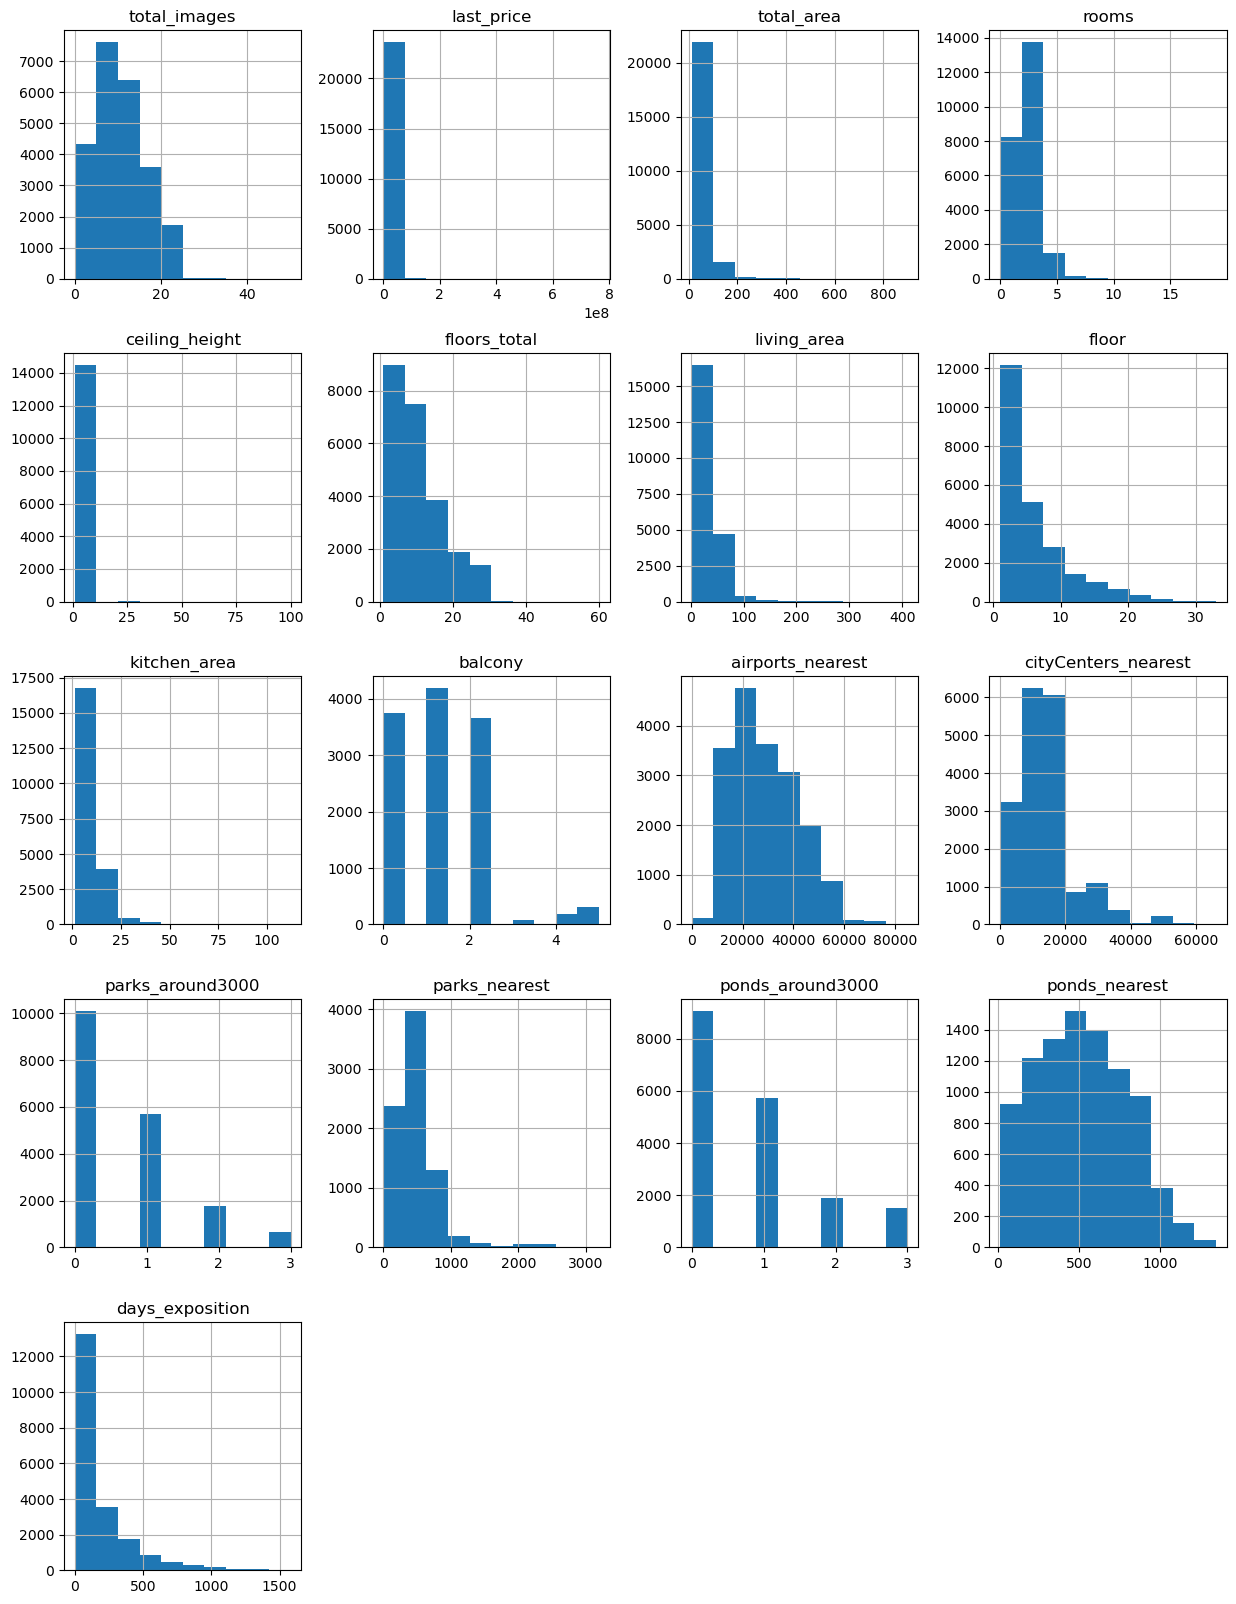

In [5]:
data.hist(figsize=(15, 20))
plt.show();

Практически на всех гистограммах видны выбросы. Возможно есть аномальные значения. Необходимо будет их найти, посчитать количество, и решить, что с ними делать.

#### Вывод по разделу

Для работы с проектом были импортированы следующие библиотеки:

    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
База содержит 22 столбца и 23699 строк.

    ceiling_height (Высота потолков) 
    floors_total (всего этажей в доме)
    living_area (жилая площадь в квадратных метрах)
    is_apartment (апартаменты)
    kitchen_area (площадь кухни в квадратных метрах)
    balcony (число балконов)
    locality_name (название населённого пункта)
    airports_nearest - (расстояние до ближайшего аэропорта в метрах (м)) 
    cityCenters_nearest (расстояние до центра города (м))
    parks_around3000 (число парков в радиусе 3 км)
    parks_nearest (расстояние до ближайшего парка (м))
    ponds_around3000 (число водоёмов в радиусе 3 км)
    ponds_nearest (расстояние до ближайшего водоёма (м))
    days_exposition (сколько дней было размещено объявление (от публикации до снятия))

Видим, что некоторые столбцы имеют пропуски. Потребуется их заполнить или удалить.

Некоторые столбцы имеют некорректный тип данных. Нужно будет поменять формат.

Потребуется проверка на неявные дубликаты столбца locality_name.

Потрубуется сделать проверку на явные дубликаты.

Были выведены в одно окно гистограммы для столбцов, которые имеют значения float и int. Практически на всех гистограммах видны выбросы. Возможно есть аномальные значения. Необходимо будет их найти, посчитать количество, и решить, что с ними делать.

### Предобработка данных

#### Определим пропущенные значения

Построим таблицу где у каждого столбца можно увидеть количество пропусков от общего числа строк фрейма и их количество.

In [6]:
diction = {
    '%_пропусков_от_всех_строк': round(data.isna().mean()*100),
    'количество_пропусков': data.isna().sum()
}

pd.DataFrame(data=diction).style.background_gradient('coolwarm')

,%_пропусков_от_всех_строк,количество_пропусков
total_images,0.000000,0
last_price,0.000000,0
total_area,0.000000,0
first_day_exposition,0.000000,0
rooms,0.000000,0
ceiling_height,39.000000,9195
floors_total,0.000000,86
living_area,8.000000,1903
floor,0.000000,0
is_apartment,88.000000,20924


Видим, что пропуски есть в 14 столбцах. Больше всего в столбце is_apartment - 88% от общего числа строк во фрейме. Обработаем их.

#### Обработка пропущенных значений 

##### Столбец ceiling_height 

ceiling_height имеет 39% пропусков. Столбец заполняется вручную пользователем, и многие из них пропускают этот пункт. Тут для заполнения пропусков подойдёт медианное значение.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

##### Столбец floors_total

floors_total имеет 86 пропусков, что незначительно. Причина: некоторые пользователи пропускают этот пункт при заполнении объявления. Поставим заглушку -1 

In [8]:
data['floors_total'] = data['floors_total'].fillna(-1)

##### Столбец living_area 

living_area имеет 8% пропусков от всех строк. Причина: некоторые пользователи пропускают этот пункт при заполнении объявления.  Поставим заглушку.

In [9]:
data['living_area'] = data['living_area'].fillna(-1)

##### Столбец is_apartment

is_apartment имеет 88% пропусков от всех строк. Причина: Практически все пользователи пропускают этот пункт при заполнении объявления. Удаление пропусков приведёт к потере большей части данных. Заглушку поставить не можем, т.к у столбца в дальнейшем поменяем тип данных на булевый. Оставим как есть.

##### Столбец kitchen_area

kitchen_area имеет 10% пропусков от всех строк. Причина: некоторые пользователи пропускают этот пункт при заполнении объявления. Поставим заглушку 

In [10]:
data['kitchen_area'] = data['kitchen_area'].fillna(-1)

##### Столбец balcony

Столбец balcony имеет 49% пропусков от всех строк. Причина: многие пользователи пропускают этот пункт при заполнении объявления. Заполним нулём, т.к отсутствие значений в этом столбце можно интерпретировать как отсутствие балконов

In [11]:
data['balcony'] = data['balcony'].fillna(0)

##### Столбец locality_name

locality_name имеет 49 пропусков, что незначительно. Причина: некоторые пользователи пропускают этот пункт при заполнении объявления. Заполним значением unknown

In [12]:
data['locality_name'] = data['locality_name'].fillna('unknown')

##### Столбцы с автоматическим заполнением

airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - все эти столбцы заполняются автоматически на основе картографических данных. Причина пропусков - вероятно система не может определить местоположения рядом каких либо аэропортов, парков, водоёмов. Поставим во всех столбцах заглушки.

In [13]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_around3000'] = data['parks_around3000'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_around3000'] = data['ponds_around3000'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data['days_exposition'] = data['days_exposition'].fillna(-1)

##### Проверка результата

Проверим результат

In [14]:
round(data.isna().mean()*100)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height           0.0
floors_total             0.0
living_area              0.0
floor                    0.0
is_apartment            88.0
studio                   0.0
open_plan                0.0
kitchen_area             0.0
balcony                  0.0
locality_name            0.0
airports_nearest         0.0
cityCenters_nearest      0.0
parks_around3000         0.0
parks_nearest            0.0
ponds_around3000         0.0
ponds_nearest            0.0
days_exposition          0.0
dtype: float64

Все пропущенные значения за исключением столбца is_apartment были заполнены.

#### Преобразование типов данных в столбцах

##### Столбец first_day_exposition

first_day_exposition содержит даты, поэтому лучше перевести столбец в формат datetime

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

##### Столбец balcony

balcony содержит информацию о количестве балконов, поэтому логично будет присвоить столбцу формат целочисленных значений.

In [17]:
data['balcony'] = data['balcony'].astype('int')

Тип данных столбца balcony был измененён с float на int

##### Столбец floors_total

floors_total содержит информацию о количестве этажей, поэтому логично будет присвоить столбцу формат целочисленных значений.

In [18]:
data['floors_total'] = data['floors_total'].astype('int')

Тип данных столбца floors_total был изменён с float на int

##### Столбец is_apartment

is_apartment содержит значния да или нет, поэтому лучше присвоить столбцу формат булевых значений.

In [19]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Тип данных столбца is_apartment изменён с object на bool

##### Столбец days_exposition

days_exposition содержит данные о количестве дней, поэтому логично будет присвоить столбцу формат целочисленных значений.

In [20]:
data['days_exposition'] = data['days_exposition'].astype('int')

Тип данных столбца days_exposition изменён с float на int

#### Обработка дубликатов

**Выясним, есть ли неявные дубликаты в названиях населённых пунктов**

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Очень много наименований городов, визуально найти неявные дубликаты очень сложно. Сразу брасается в глаза, что во многих местах слово поселок пишется через е, а где-то, через ё. Заменим везде ё на е.

In [22]:
def change_name(row):
    if 'посёлок' in row.split():
        row = row.replace('посёлок', 'поселок')
    else:
        row
    return row
        
data['locality_name'] = data['locality_name'].apply(change_name)
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Далее создадим словарь, куда будут внесены названия городов (без дополнительных описаний типа населённого пункта) и количество упоминаний в массиве из уникальных значений столбца 'locality_name'.

In [23]:
dictionary_of_words= {}

words_to_remove = ['поселок', 
                   'посёлок', 
                   'городского', 
                   'типа', 
                   'имени', 
                   'городской', 
                   'станции', 
                   'при', 
                   'железнодорожной', 
                   'коттеджный',
                   'садоводческое',
                   'некоммерческое',
                   'товарищество',
                   'садовое',
                   'Пансионат',
                   'деревня',
                   'село']

i = 0
word_list = []

for sentence in data['locality_name'].unique():
    for word in sentence.split():
        i += 1
        if word not in words_to_remove:
            word_list.append(word)
        if len(sentence.split()) == i:
            cleared_sentence = ' '.join(word_list)
            word_list = []
            i = 0
            if cleared_sentence not in dictionary_of_words:
                dictionary_of_words[cleared_sentence] = 1
            elif cleared_sentence in dictionary_of_words:
                dictionary_of_words[cleared_sentence] += 1
            
            
dictionary_of_words

{'Санкт-Петербург': 1,
 'Шушары': 1,
 'Янино-1': 1,
 'Парголово': 1,
 'Мурино': 2,
 'Ломоносов': 1,
 'Сертолово': 1,
 'Петергоф': 1,
 'Пушкин': 1,
 'Кудрово': 2,
 'Коммунар': 1,
 'Колпино': 1,
 'Красный Бор': 1,
 'Гатчина': 1,
 'Фёдоровское': 2,
 'Выборг': 1,
 'Кронштадт': 1,
 'Кировск': 1,
 'Новое Девяткино': 1,
 'Металлострой': 1,
 'Лебяжье': 1,
 'Сиверский': 1,
 'Молодцово': 1,
 'Кузьмоловский': 1,
 'Новая Ропша': 1,
 'Павловск': 1,
 'Пикколово': 1,
 'Всеволожск': 1,
 'Волхов': 1,
 'Кингисепп': 1,
 'Приозерск': 1,
 'Сестрорецк': 1,
 'Куттузи': 1,
 'Аннино': 1,
 'Ефимовский': 1,
 'Плодовое': 1,
 'Заклинье': 1,
 'Торковичи': 1,
 'Первомайское': 1,
 'Красное Село': 1,
 'Понтонный': 1,
 'Сясьстрой': 1,
 'Старая': 1,
 'Лесколово': 1,
 'Новый Свет': 1,
 'Сланцы': 1,
 'Путилово': 1,
 'Ивангород': 1,
 'Шлиссельбург': 1,
 'Никольское': 2,
 'Зеленогорск': 1,
 'Сосновый Бор': 1,
 'Оржицы': 1,
 'Кальтино': 1,
 'Романовка': 1,
 'Бугры': 1,
 'Рощино': 2,
 'Кириши': 1,
 'Луга': 1,
 'Волосово': 1,


Далее создадим список, куда внесем все города, которые встречаются более одного раза в словаре. 

In [24]:
dublicates = []

for word in dictionary_of_words:
    if dictionary_of_words[word] > 1:
        dublicates.append(word)
        
dublicates

['Мурино',
 'Кудрово',
 'Фёдоровское',
 'Никольское',
 'Рощино',
 'Павлово',
 'Советский',
 'Большая Ижора',
 'Лесогорский',
 'Рахья',
 'Зимитицы',
 'Рябово',
 'Мга',
 'Вещево',
 'Калитино',
 'Приладожский',
 'Щеглово',
 'Рабитицы',
 'Назия',
 'Гарболово',
 'Приветнинское',
 'Любань',
 'Громово',
 'Лесное']

В списке видим названия насёленный пунктов, которые несколько раз повторяются в списке уникальных значений. Теперь выведем их полные названия

In [25]:
for word in dublicates:
    for word_2 in data['locality_name'].unique():
        if word in word_2.split():
            print(word_2)

поселок Мурино
Мурино
деревня Кудрово
Кудрово
деревня Фёдоровское
городской поселок Фёдоровское
Никольское
село Никольское
поселок городского типа Рощино
городской поселок Рощино
село Павлово
городской поселок Павлово
поселок городского типа Павлово
поселок городского типа Советский
городской поселок Советский
городской поселок Лесогорский
поселок городского типа Лесогорский
поселок городского типа Рахья
садовое товарищество Рахья
поселок Зимитицы
деревня Зимитицы
поселок Рябово
поселок городского типа Рябово
городской поселок Мга
поселок городского типа Мга
поселок станции Вещево
поселок при железнодорожной станции Вещево
деревня Калитино
поселок Калитино
поселок городского типа Приладожский
садовое товарищество Приладожский
поселок Щеглово
деревня Щеглово
деревня Рабитицы
поселок Рабитицы
городской поселок Назия
поселок городского типа Назия
деревня Гарболово
поселок Гарболово
поселок станции Приветнинское
поселок при железнодорожной станции Приветнинское
Любань
поселок Любань
посело

Видим полные названия населённых пунтков. Чтобы решить, является ли название дубликатами или просто одинаковыми названиями разных населенных пунтков, будем использовать открытые источники в интернете. 

##### Мурино

В данных есть "поселок Мурино" и "Мурино". В 2019 году посёлок Мурино получил статус города. Уберём слово "поселок"

In [26]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')

##### Кудрово

Кудрово раньше было деревней, сейчас является городом. Уберём слово 'деревня'

In [27]:
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

##### Фёдоровское

Деревня Фёдоровское была преобразована в городской посёлок. Уберём слово 'деревня'

In [28]:
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское', 'городской поселок Фёдоровское')

##### Никольское

В данных есть "Никольское" и "село Никольское". В Ленинградской области есть и то, и другое. Оставим как есть.

##### Рощино

поселок городского типа Рощино и городской поселок Рощино равнозначны. Оставим только второй вариант.

In [29]:
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рощино', 'городской поселок Рощино')

##### Павлово

Существуют одновременно и село Павлово, и городской поселок Павлово в Ленинградской области. Тут оставим как есть. городской поселок Павлово и поселок городского типа Павлово равнозначны. Оставим первый вариант.

In [30]:
data['locality_name'] = data['locality_name'].replace('поселок городского типа Павлово', 'городской поселок Павлово')

##### Советский

В данных есть "поселок городского типа Советский" и "городской поселок Советский". Значения равнсильны. Оставим первый вариант.

In [31]:
data['locality_name'] = data['locality_name'].replace('городской поселок Советский', 'поселок городского типа Советский')

##### Лесогорский

В данных есть "городской поселок Лесогорский" и "поселок городского типа Лесогорский". Значения равносильны. Оставим второй вариант.

In [32]:
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')

##### Рахья

Во фрейме есть садовое товарищество Рахья и поселок городского типа Рахья. Оставим второй вариант.

In [33]:
data['locality_name'] = data['locality_name'].replace('садовое товарищество Рахья', 'поселок городского типа Рахья')

##### Зимитицы

В Ленинградской области есть и поселок Зимитицы, и деревня Зимитицы. Оставим как есть.

##### Рябово

В Ленинградской области есть поселок Рябово и поселок городского типа Рябово. Оставим как есть.

##### Мга

Городской поселок Мга и поселок городского типа Мга равнозначны. Оставим первый вариант.

In [34]:
data['locality_name'] = data['locality_name'].replace('поселок городского типа Мга', 'городской поселок Мга')

##### Вещево

поселок станции Вещево и поселок при железнодорожной станции Вещево равнозначны. Оставим первый вариант.

In [35]:
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')

##### Калитино

В Ленинградской области есть и деревня Калитино, и поселок Калитино. Оставим оба варианта.

##### Приладожский

Во фрейме есть Поселок городского типа Приладожский и садовое товарищество Приладожский. Оставим только первый вариант.

In [36]:
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский')

##### Щеглово

В Ленинградской области есть и поселок Щеглово, и деревня Щеглово. Оставим без изменений.

##### Рабитицы

В данных есть "деревня Рабитицы" и "поселок Рабитицы". В Ленинградской области есть и то, и другое. Оставим как есть.

##### Назия

городской поселок Назия и поселок городского типа Назия равнозначны. Оставим первый вариант.

In [37]:
data['locality_name'] = data['locality_name'].replace('поселок городского типа Назия', 'городской поселок Назия')

##### Гарболово

Во фрейме есть деревня Гарболово и поселок Гарболово. В открытых источниках есть информация только о деревне, упоминаний о поселке нет. Оставим только первый вариант.

In [38]:
data['locality_name'] = data['locality_name'].replace('поселок Гарболово', 'деревня Гарболово')

##### Приветнинское

В данных есть "поселок станции Приветнинское" и "поселок при железнодорожной станции Приветнинское". Значения равносильны. Оставим первый вариант.

In [39]:
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')

##### Любань

В Ленинградской области есть город Любань и поселок Любань. Оставим оба варианта.

##### Громово

В Ленинградской области есть поселок станции Громово и поселок Громово. Оставим без изменений.

##### Лесное

В данных есть "поселок Лесное" и "коттеджный поселок Лесное". В Ленинградской области есть оба варианта. Оставим без изменений.

##### Проверка результата

Выведем обновленный список

In [40]:
for word in dublicates:
    for word_2 in data['locality_name'].unique():
        if word in word_2.split():
            print(word_2)

Мурино
Кудрово
городской поселок Фёдоровское
Никольское
село Никольское
городской поселок Рощино
село Павлово
городской поселок Павлово
поселок городского типа Советский
поселок городского типа Лесогорский
поселок городского типа Рахья
поселок Зимитицы
деревня Зимитицы
поселок Рябово
поселок городского типа Рябово
городской поселок Мга
поселок станции Вещево
деревня Калитино
поселок Калитино
поселок городского типа Приладожский
поселок Щеглово
деревня Щеглово
деревня Рабитицы
поселок Рабитицы
городской поселок Назия
деревня Гарболово
поселок станции Приветнинское
Любань
поселок Любань
поселок станции Громово
поселок Громово
поселок Лесное
коттеджный поселок Лесное


Неявные дубликаты были обработаны.

#### Поиск явных дубликатов

**Проверим базу на наличие явных дубликатов**

In [41]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены

#### Вывод по разделу

При предобработке данных были найдены пропуски в 14 столбцах. Они найдены как и в столбцах, которые заполняются вручную пользователем, так и в тех, котрые заполняются автоматически. Пропуски были заполнены везде кроме столбца 'is_apartment'

Были преобразованы типы данных в следующих столбцах: first_day_exposition, balcony, floors_total, is_apartment, days_exposition

Были обработаны неявные дубликаты в столбце locality_name.

Была проведена проверка на явные дубликаты, они отсутствуют.

### Добавление новых столбцов

#### Столбец price_of_1_metre

**Добавим столбец где будет указана цена за 1 метр объекта**

In [42]:
data['price_of_1_metre'] = data['last_price'] / data['total_area']

#### Столбец weekday

**Добавим столбец с указанием дня недели публикации объявления**

In [43]:
data['weekday'] = data['first_day_exposition'].dt.weekday

#### Столбец month

**Добавим столбец с указанием месяца публикации объявления**

In [44]:
data['month'] = data['first_day_exposition'].dt.month

#### Столбец year

**Добавим столбец с указанием года публикации объявления**

In [45]:
data['year'] = data['first_day_exposition'].dt.year

#### Столбец type_of_floor

**Добавим столбец с указанием типа этажа, на котором находится объект недвижимости**

In [46]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой' 


data['type_of_floor'] = data.apply(categorize_floor, axis=1)

#### cityCenters_nearest_km

**Добавим столбец с указанием удаленности от центра города в километрах**

In [47]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

#### Вывод по разделу

В таблицу были добавлены новые столбцы:

    'price_of_1_metre' - цена за 1 метр объекта
    'weekday' - день недели публикации объявления
    'month' - месяц публикации объявления
    'year' -  год публикации объявления
    'cityCenters_nearest_km' - удаленность от центра города в километрах

### Исследовательский анализ данных

Напишем функцию построения гистограммы

In [48]:
def create_hist(column, bins=10, range=True, range_low=0, range_high=0):
    if range == True:
        data[column].hist(bins=bins, range=(range_low, range_high));
    if range == False:
        data[column].hist(bins=bins);
    plt.title(f' Гистограмма столбца {column}')
    plt.ylabel('Частота')
    plt.xlabel(f'Значение столбца {column}')

Напишем функцию вычисления минимума, максимума, моды, среднего, медианы

In [49]:
def calculate_min_max_mode(column):
    print('Минимальное значение:', data[column][data[column] >= 0].min())
    print('Максимальное значение:', data[column].max())
    print('Мода:', data[column][data[column] >= 0].mode()[0])
    print('Среднее:', data[column].mean())
    print('Медиана:', data[column].median())

Напишем функцию построения ящика с усами, чтобы точнее видеть аномалии и выбросы в данных

In [50]:
def create_boxplot(column, approximation=False, y_low=0, y_high=0):
    if approximation==False:
        data.boxplot(column=column);
        plt.title(f' Ящик с усами столбца {column}')
        plt.ylabel('Значение столбца')
    else:
        data.boxplot(column=column);
        plt.title(f' Ящик с усами столбца {column}')
        plt.ylabel('Значение столбца')
        ax = plt.gca()
        ax.set_ylim([y_low, y_high])

Напишем функцию для вычисления выбросов

In [51]:
def calculate_ejection(query):
    procent = len(query) / len(data) * 100
    print(f'Количество выбросов от общего количества строк: {procent:.2f}%')

#### Изучим и опишем основные параметры

##### Столбец total_area

**Построим гистограмму полной площади**

In [53]:
calculate_min_max_mode('total_area')

Минимальное значение: 12.0
Максимальное значение: 900.0
Мода: 45.0
Среднее: 60.34865099793241
Медиана: 52.0


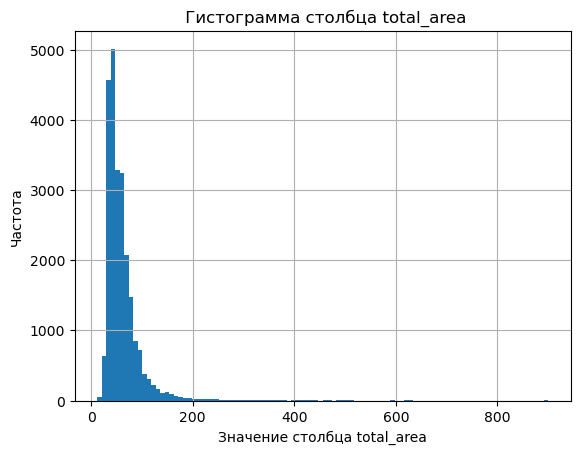

In [52]:
create_hist('total_area', 100, False)

Гистограмма имеет вид нормального распределения с длинным хвостом справа. Найдём выбросы в данных

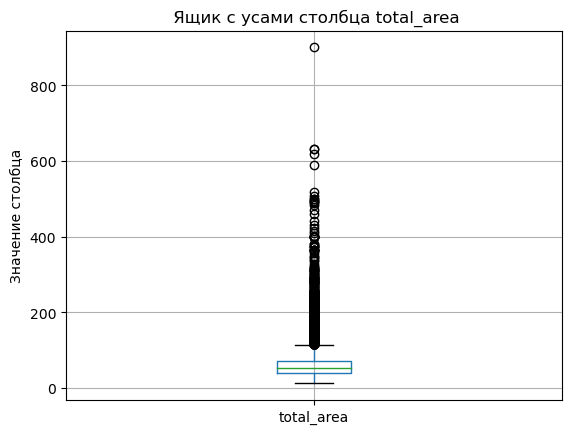

In [54]:
create_boxplot('total_area')

Видим выбросы выше верхнего уса. Приблизим график

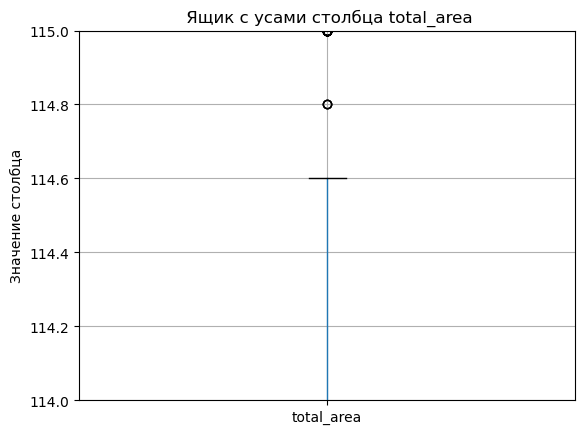

In [55]:
create_boxplot('total_area', True, 114, 115)

Выбросами считаются значения от 114.8. Посчитаем их количество

In [56]:
calculate_ejection(data[data['total_area'] >= 114.8])

Количество выбросов от общего количества строк: 5.23%


Удалим выбросы

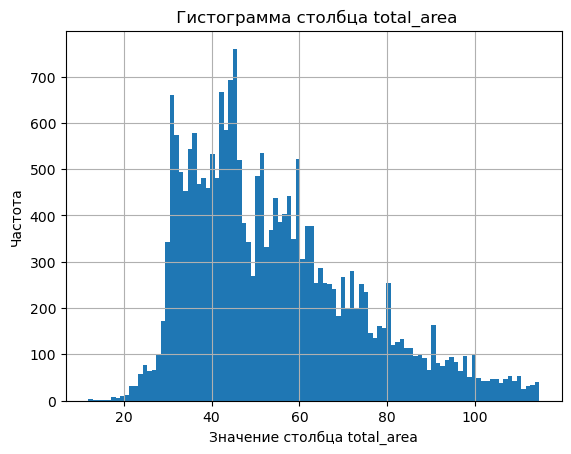

In [57]:
data = data[data['total_area'] < 114.8]
#Проверим результат
create_hist('total_area', 100, False)

Гистограмма приобрела более правильный вид нормального распределения.

##### Столбец living_area

**Построим гистограмму жилой площади**

In [58]:
calculate_min_max_mode('living_area')

Минимальное значение: 2.0
Максимальное значение: 101.0
Мода: 18.0
Среднее: 28.546521729150896
Медиана: 28.4


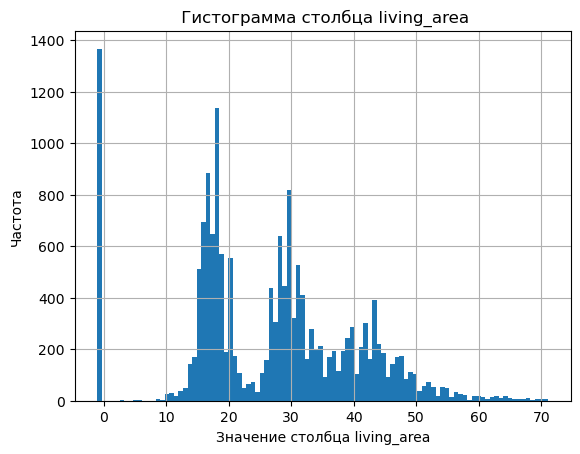

In [143]:
create_hist('living_area', 100, False)

У столбца есть заглушка -1. В остальном видно, что присутствуют выбросы и несколько пиков около 15, 30, 42. Посмотрим на ящик с усами 

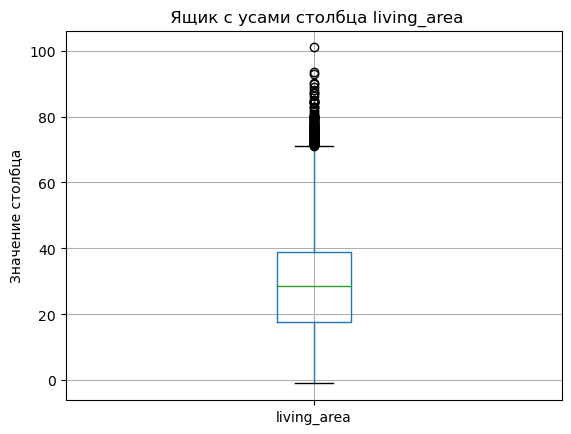

In [60]:
create_boxplot('living_area')

Видим выбросы выше верхнего уса. Приблизим график

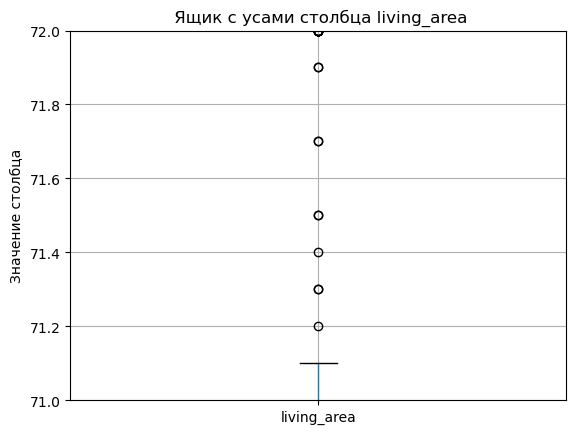

In [61]:
create_boxplot('living_area', True, 71, 72)

Выбросами считаются значения от 71.2. Посчитаем их количество

In [62]:
calculate_ejection(data[data['living_area'] >= 71.2])

Количество выбросов от общего количества строк: 0.69%


Удалим выбросы

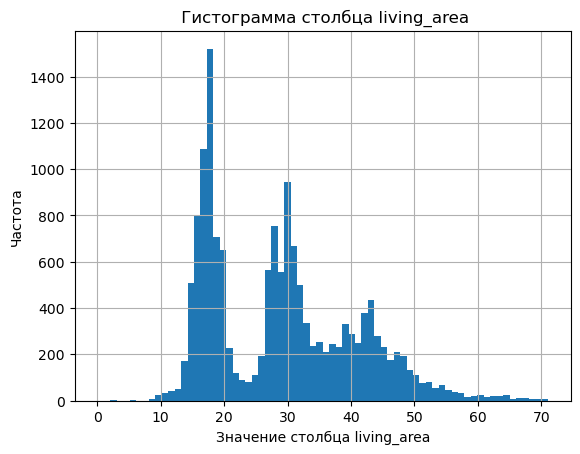

In [146]:
data = data[data['living_area'] < 71.2]
#Проверим результат
create_hist('living_area', 70, True, 0, 71.1)

In [147]:
calculate_min_max_mode('living_area')

Минимальное значение: 3.0
Максимальное значение: 71.1
Мода: 18.0
Среднее: 26.58266810042114
Медиана: 27.6


После удаления видим, что хвост справа стал меньше.

##### Столбец kitchen_area

**Построим гистограмму площади кухни**

In [64]:
calculate_min_max_mode('kitchen_area')

Минимальное значение: 1.3
Максимальное значение: 55.7
Мода: 6.0
Среднее: 8.835093485181364
Медиана: 8.6


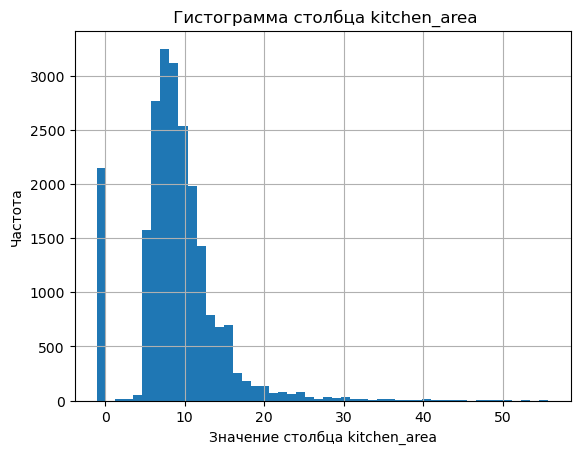

In [65]:
create_hist('kitchen_area', 50, False)

У столбца присутствует заглушка -1. В остальном видны видны выбросы с правой стороны графика. Посмотрим на ящик с усами

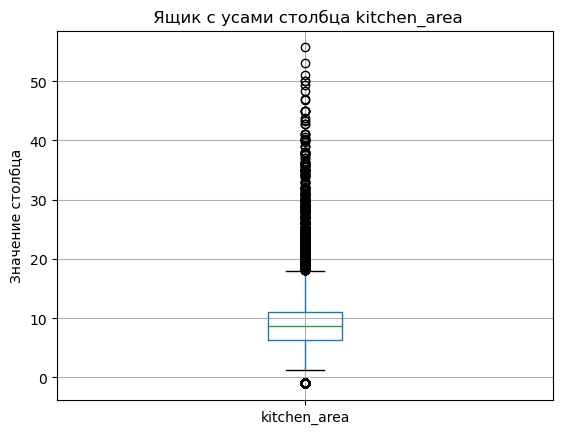

In [66]:
create_boxplot('kitchen_area')

Видим выбросы после верхнего уса (Значение перед нижним усом, является заглушкой). Приблизим график выше верхнего уса

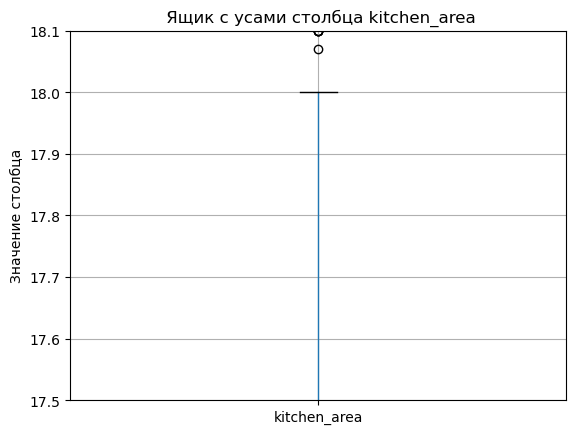

In [67]:
create_boxplot('kitchen_area', True, 17.5, 18.1)

Выше верхнего уса выбросами являются значения больше 18. Посчитаем их количество

In [68]:
calculate_ejection(data[data['kitchen_area'] > 18])

Количество выбросов от общего количества строк: 3.66%


Удалим выбросы

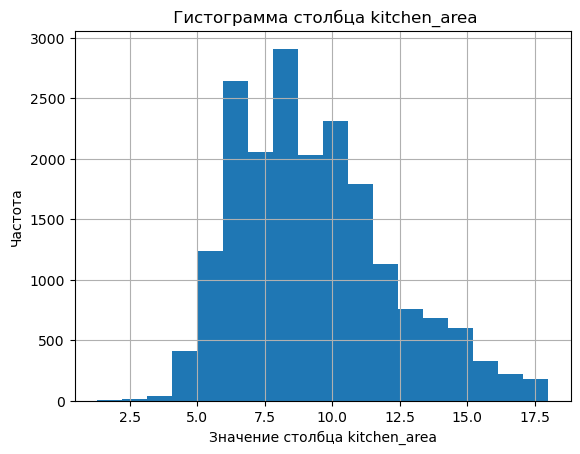

In [69]:
data = data[data['kitchen_area'] <= 18]
#Проверим результат
create_hist('kitchen_area', 18, True, 1.3, 18)

In [148]:
calculate_min_max_mode('kitchen_area')

Минимальное значение: 2.0
Максимальное значение: 18.0
Мода: 6.0
Среднее: 7.872265258912154
Медиана: 8.0


График приобрел более приемлемый вид нормального распределения.

##### Столбец last_price

**Построим гистограмму цены объекта**

In [70]:
calculate_min_max_mode('last_price')

Минимальное значение: 430000.0
Максимальное значение: 48000000.0
Мода: 4500000.0
Среднее: 5052666.39153907
Медиана: 4400000.0


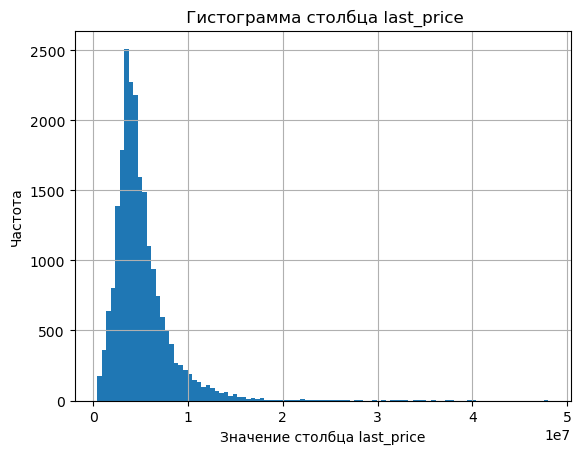

In [71]:
create_hist('last_price', 100, False)

Гистраграмма имеет вид нормального распределения с длинным хвостом справа. Посмотрим на ящик с усами

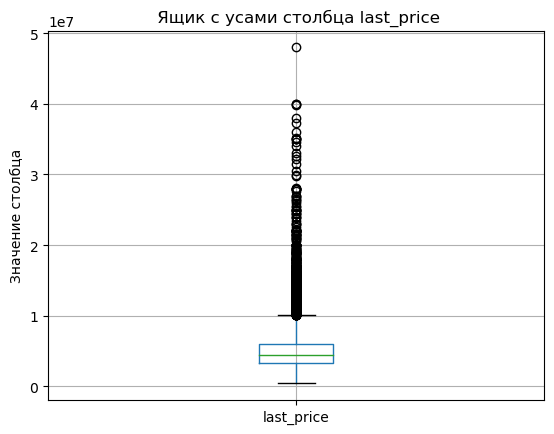

In [72]:
create_boxplot('last_price')

Видим выбросы после верхнего уса. Наличие аномально больших и маленьких значений выявить сложно, т.к продавец сам выбирает, какую цену установить. Приблизим график

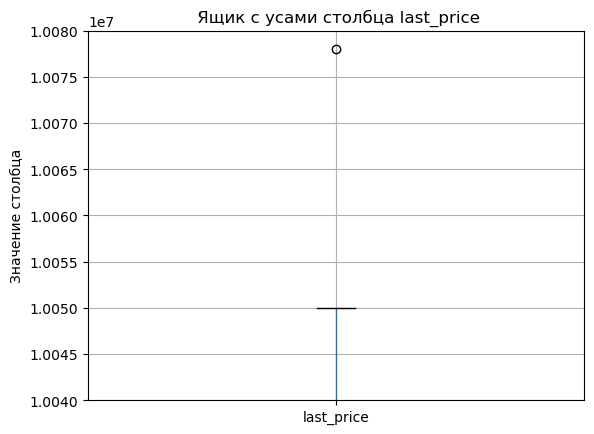

In [73]:
create_boxplot('last_price', True, 10040000, 10080000)

Видим, что выбросы имеют значение больше 10 050 000. Посчитаем их количество.

In [74]:
calculate_ejection(data[(data['last_price'] > 10050000)])

Количество выбросов от общего количества строк: 5.26%


Удалим выбросы

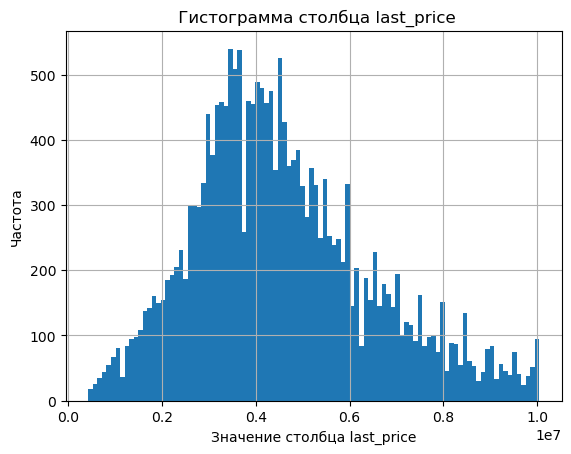

In [75]:
data = data[(data['last_price'] <= 10050000)]
#Проверим результат
create_hist('last_price', 100, False)

In [149]:
calculate_min_max_mode('last_price')

Минимальное значение: 430000.0
Максимальное значение: 10050000.0
Мода: 4500000.0
Среднее: 4356956.342309746
Медиана: 4100000.0


График теперь имеет приемлемый вид нормального распределения.

##### Столбец rooms

**Построим гистограмму количества комнат**

In [77]:
calculate_min_max_mode('rooms')

Минимальное значение: 0
Максимальное значение: 6
Мода: 1
Среднее: 1.880434248661394
Медиана: 2.0


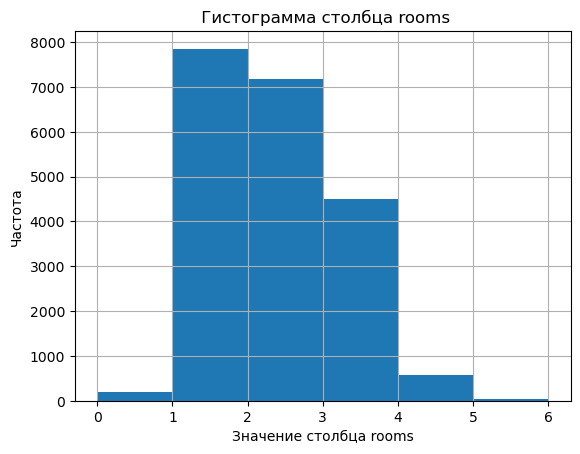

In [76]:
create_hist('rooms', 6, False)

График имеет вид нормального распределения. Но столбец имеет минимальное значение 0, что очевидно являеся аномалией. Посмотрим на боксплот

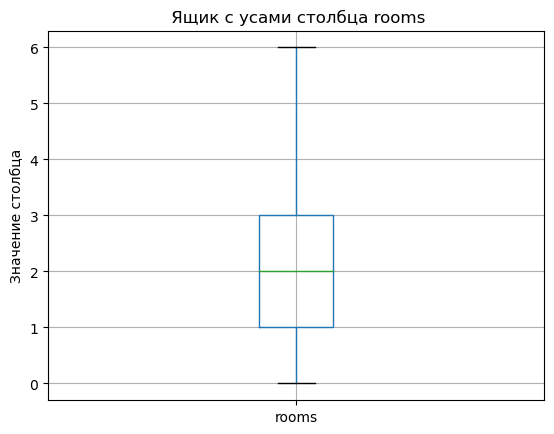

In [78]:
create_boxplot('rooms')

Выбросов нет. Проверим их количество аномалий со значением 0

In [79]:
calculate_ejection(data[data['rooms'] == 0])

Количество выбросов от общего количества строк: 0.96%


Чуть меньше 1% от всех строк. Удалим их

In [80]:
data = data[data['rooms'] > 0]

##### Столбец ceiling_height

In [81]:
calculate_min_max_mode('ceiling_height')

Минимальное значение: 1.0
Максимальное значение: 32.0
Мода: 2.65
Среднее: 2.687898521972026
Медиана: 2.65


**Построим гистограмму высоты потолков**

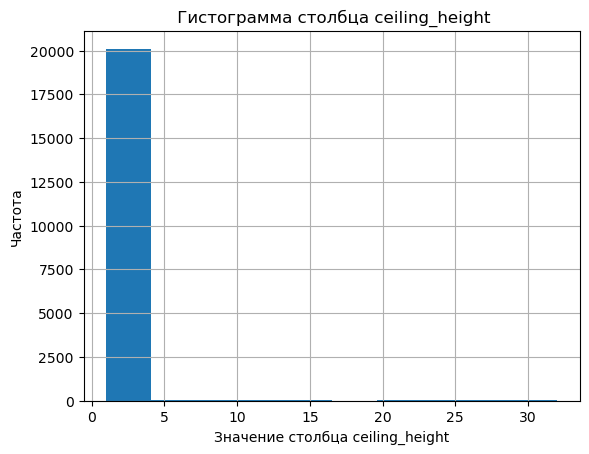

In [82]:
create_hist('ceiling_height', 10, False)

У столбца видны выбросы с правой стороны графика. Максимальное значение столбца - 32, очевидно, является аномалией. Построим boxplot.

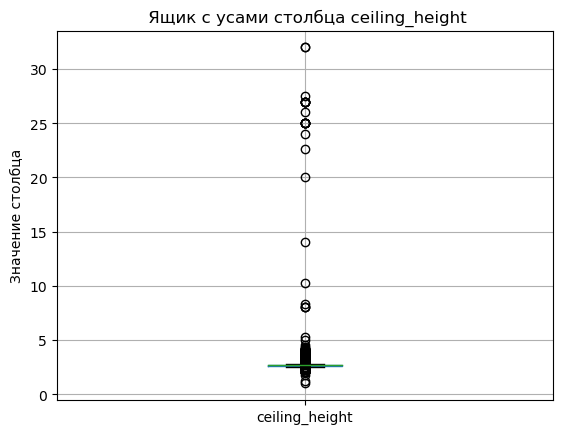

In [83]:
create_boxplot('ceiling_height')

Видим выбросы с обеих сторон ящика. Приблизим график

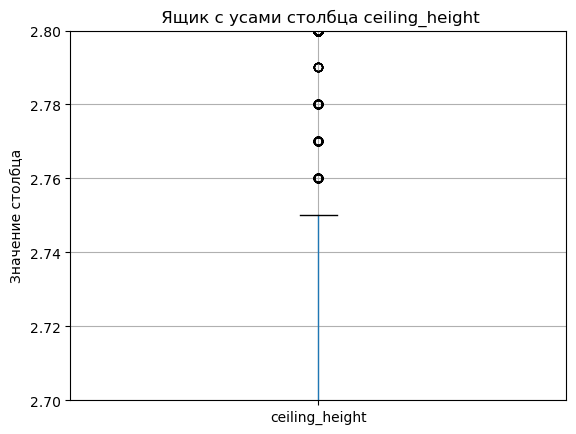

In [84]:
create_boxplot('ceiling_height', True, 2.7, 2.8)

Выбросами являются значение от 2.76. Посчитаем их количество

In [85]:
calculate_ejection(data[data['ceiling_height'] > 2.75])

Количество выбросов от общего количества строк: 12.73%


Приблизим график к нижнему усу

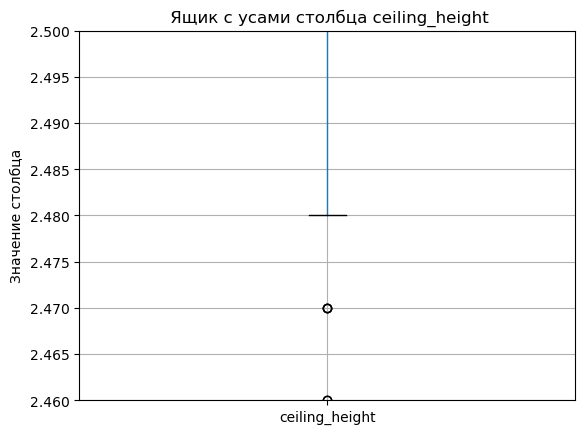

In [86]:
create_boxplot('ceiling_height', True, 2.46, 2.5)

Выбросами также являются значния до 2.47. Посчитаем их количество

In [87]:
calculate_ejection(data[data['ceiling_height'] < 2.47])

Количество выбросов от общего количества строк: 0.29%


Удалим выбросы с обеих сторон боксплота

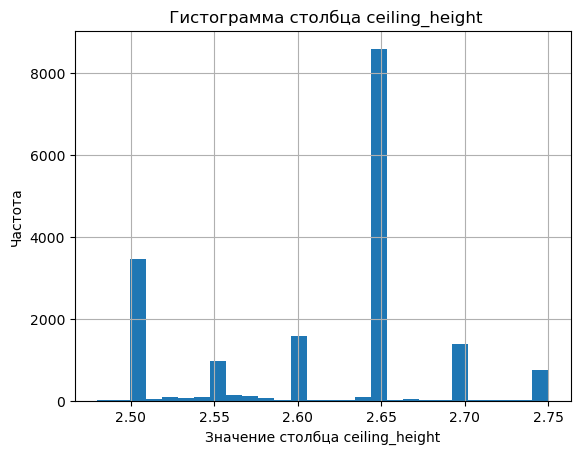

In [88]:
data = data[data['ceiling_height'] <= 2.75]
data = data[data['ceiling_height'] > 2.47]

#Проверим результат
create_hist('ceiling_height', 28, False)

In [89]:
calculate_min_max_mode('ceiling_height')

Минимальное значение: 2.48
Максимальное значение: 2.75
Мода: 2.65
Среднее: 2.61551785103228
Медиана: 2.65


На гистограмме видны пики каждые 5 см. Диапазон на графике соответствует информации о стандартных высотах полотка из открытых источников в интернете.

##### Столбец floor

**Построим гистограмму этажей, на котором находятся выставляемые на продажу объекты**

In [90]:
calculate_min_max_mode('floor')

Минимальное значение: 1
Максимальное значение: 33
Мода: 2
Среднее: 5.920098095129463
Медиана: 4.0


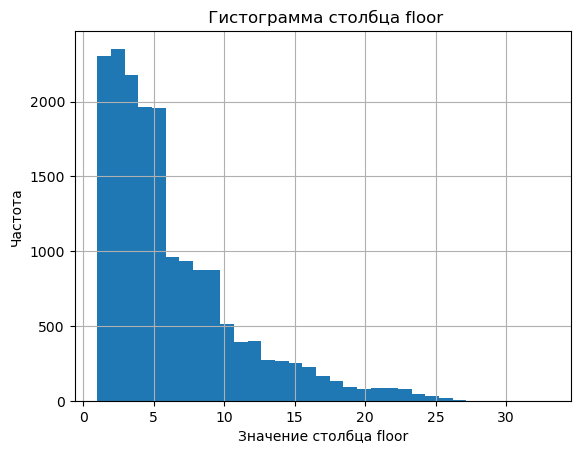

In [91]:
create_hist('floor', 33, False)

Гистограмма имеет длинный хвост справа. Посмотрим на боксплот

Посмотрим на ящик с усами столбца floor

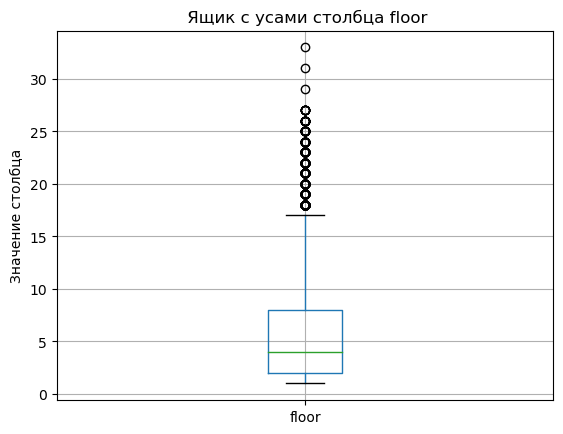

In [92]:
create_boxplot('floor')

Видим выбросы выше верхнего уса. Приблизим график.

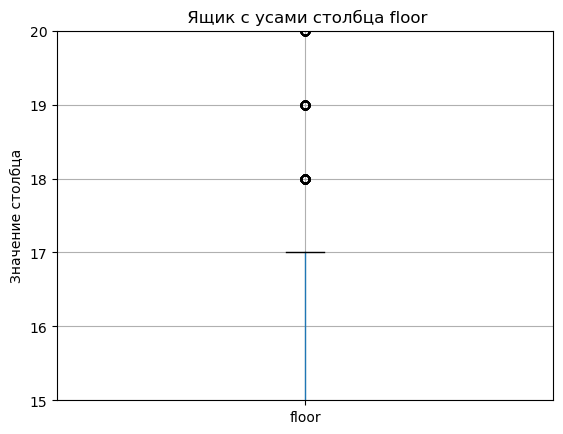

In [93]:
create_boxplot('floor', True, 15, 20)

Выбросами считаются значения выше 17. Посчитаем их количество.

In [94]:
calculate_ejection(data[data['floor'] > 17])

Количество выбросов от общего количества строк: 3.76%


Удалим выбросы

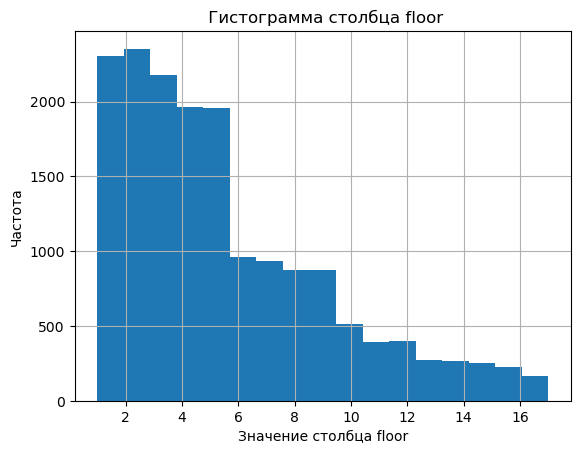

In [95]:
data = data[data['floor'] <= 17]
#Проверим результат
create_hist('floor', 17, False)

In [150]:
calculate_min_max_mode('floor')

Минимальное значение: 1
Максимальное значение: 17
Мода: 2
Среднее: 5.326591138264429
Медиана: 4.0


Видим, что гистограмма после удаления выбросов также имеет самые большие значение слева, после чего равномерно уменьшается.

##### Столбец type_of_floor

**Построим гистограмму типов этажей, на котором находятся продаваемые объекты**

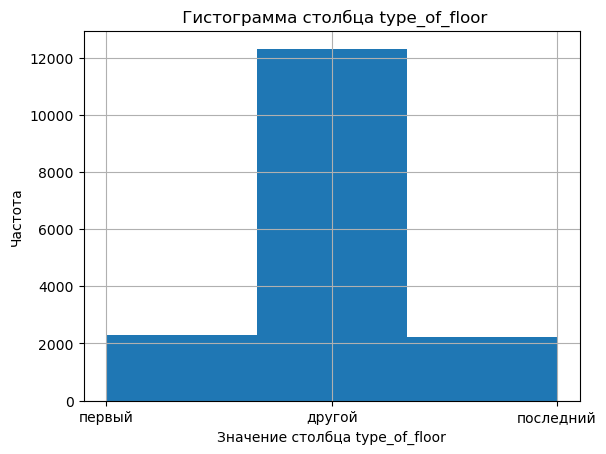

In [96]:
create_hist('type_of_floor', 3, False)

Значения этажей типа "другой" значительно превышают остальные.

##### Столбец floors_total

**Построим гистограмму общего количества этажей зданий, в котором находятся продаваемые объекты**

In [97]:
calculate_min_max_mode('floors_total')

Минимальное значение: 1
Максимальное значение: 35
Мода: 5
Среднее: 10.268977777777778
Медиана: 9.0


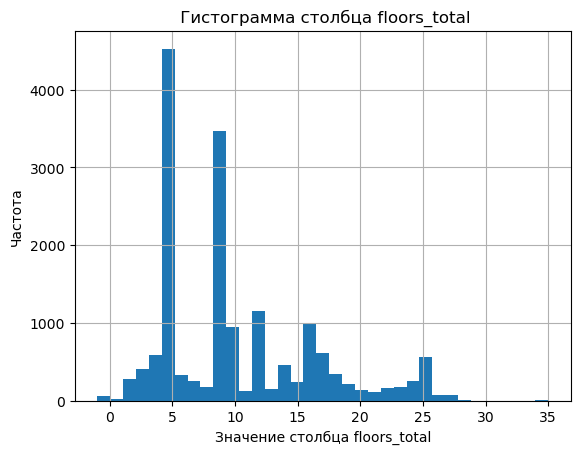

In [98]:
create_hist('floors_total', 35, False)

Видим, то гистограмма имеет несколько пиков. Посмотрим на ящик с усами 

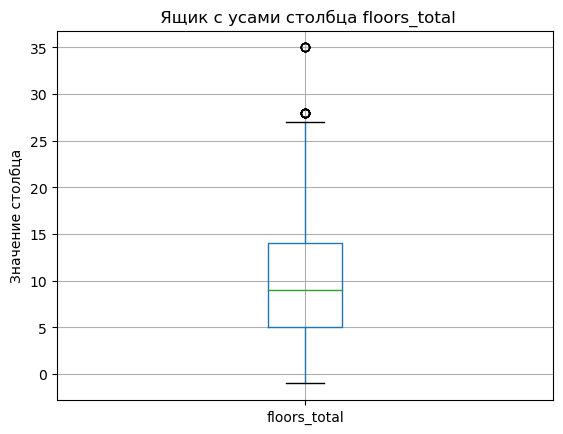

In [99]:
create_boxplot('floors_total')

Выбросами являются значения от 28. Посчитаем их количество

In [100]:
calculate_ejection(data[(data['floors_total'] >= 28)])

Количество выбросов от общего количества строк: 0.09%


Выбросы занимают чуть менее 1/10 процента от общего числа строк. Удалим их

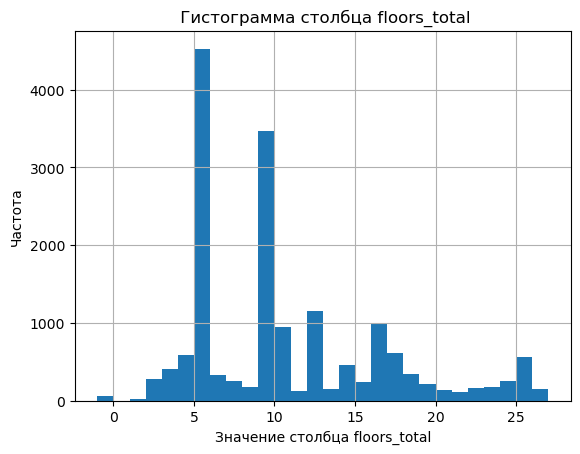

In [101]:
data = data[data['floors_total'] < 28]
#Проверим результат
create_hist('floors_total', 28, False)

In [151]:
calculate_min_max_mode('floors_total')

Минимальное значение: 1
Максимальное значение: 27
Мода: 5
Среднее: 10.249658935879946
Медиана: 9.0


Выбросы были удалены. Хвост на графике справа стал меньше.

##### Столбец cityCenters_nearest

**Построим гистограмму удаленности от центра города**

In [102]:
calculate_min_max_mode('cityCenters_nearest')

Минимальное значение: 467.0
Максимальное значение: 65968.0
Мода: 17121.0
Среднее: 11511.340233703067
Медиана: 12032.0


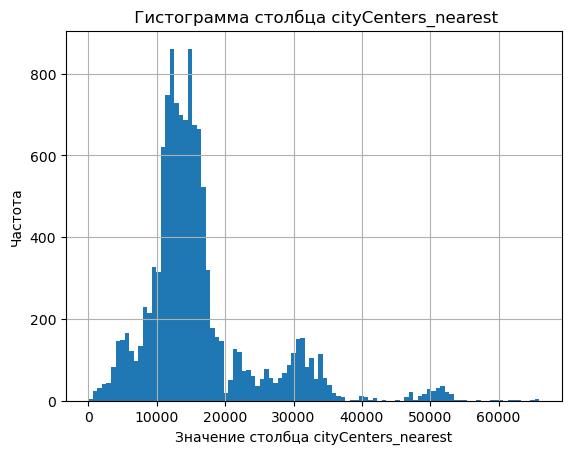

In [103]:
create_hist('cityCenters_nearest', 100, True, 0, 65968)

Столбец имеет заглушку -1. Видим хвост справа. Посмотрим на ящик с усами 

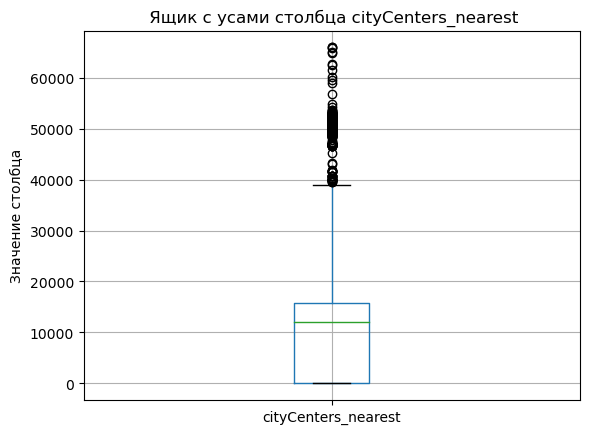

In [104]:
create_boxplot('cityCenters_nearest')

Видим выбросы выше верхнего уса. Приблизим график

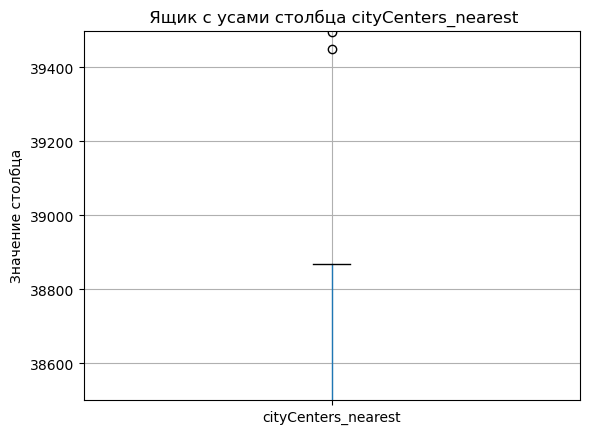

In [105]:
create_boxplot('cityCenters_nearest', True, 38500, 39500)

Выбросами являются значения выше 39400. Посчитаем их количество

In [106]:
calculate_ejection(data[data['cityCenters_nearest'] > 39400])

Количество выбросов от общего количества строк: 1.54%


Поскольку данный столбец расчитывается автоматически, то оставим выбросы как есть, чтобы не потерять важную информацию в других столбцах.

##### Столбец airports_nearest

**Построим гистограмму удалённости от аэропорта**

In [107]:
calculate_min_max_mode('airports_nearest')

Минимальное значение: 0.0
Максимальное значение: 84869.0
Мода: 47303.0
Среднее: 21054.006761966903
Медиана: 19161.0


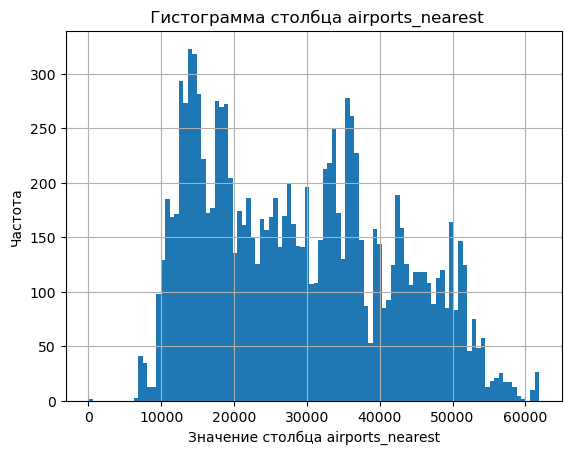

In [108]:
create_hist('airports_nearest', 100, True, 0, 61908)

Гистограмма имеет вид близкий к нормальному. Посмотрим на ящик с усами

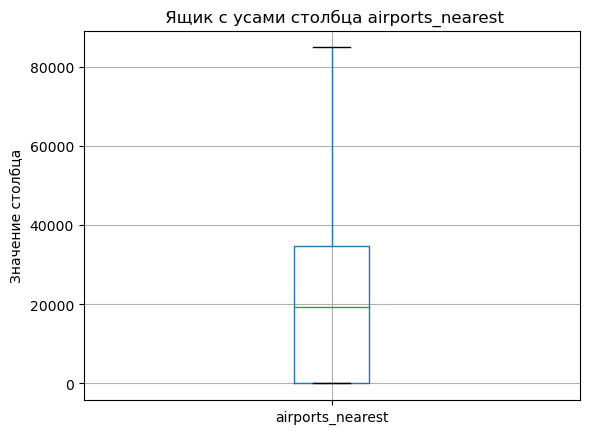

In [109]:
create_boxplot('airports_nearest')

Выбросов нет.

##### Столбец parks_nearest

**Построим гистограмму удалённости от ближайшего парка**

In [110]:
calculate_min_max_mode('parks_nearest')

Минимальное значение: 1.0
Максимальное значение: 3190.0
Мода: 392.0
Среднее: 138.75087490361233
Медиана: -1.0


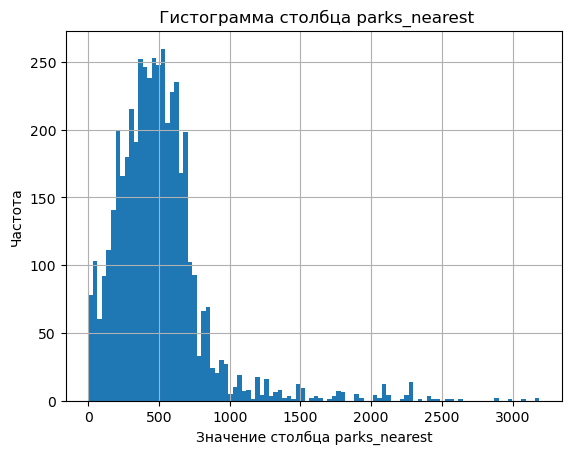

In [111]:
create_hist('parks_nearest', 100, True, 0, 3190)

Столбец имеет заглушку -1. Гистограмма имеет форму нормального распределения с длинным хвостом справа. Посмотрим на ящик с усами 

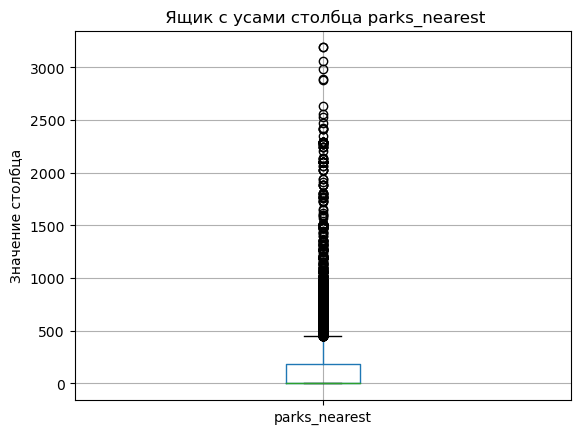

In [112]:
create_boxplot('parks_nearest')

Видим выбросы после первого уса. Приблизим график

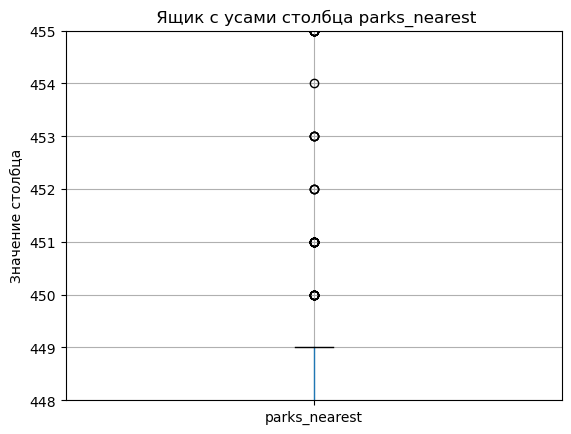

In [113]:
create_boxplot('parks_nearest', True, 448, 455)

Выбросы имеют значения от 450. Посчитаем их количество.

In [114]:
calculate_ejection(data[data['parks_nearest'] >= 450])

Количество выбросов от общего количества строк: 14.57%


Поскольку данный столбец расчитывается автоматически, то оставим выбросы как есть, чтобы не потерять важную информацию в других столбцах.

##### Столбец weekday 

**Построим гистограмму дней недели публикации объявления**

In [115]:
calculate_min_max_mode('weekday')

Минимальное значение: 0
Максимальное значение: 6
Мода: 3
Среднее: 2.5830120410463255
Медиана: 3.0


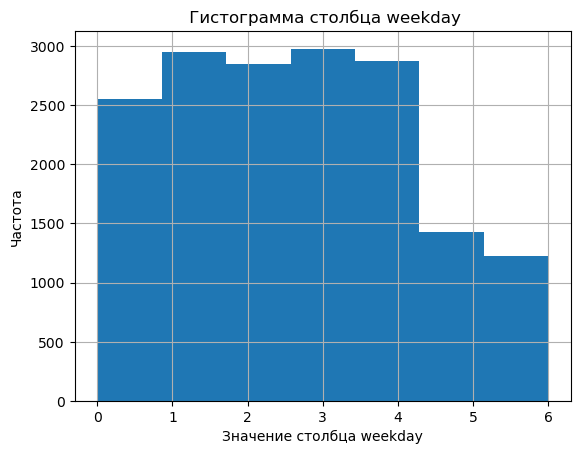

In [116]:
create_hist('weekday', 7, False)

По гистограмме видим, что люди публикуют чаще объявления в будние дни.

##### Столбец month

**Построим гистограмму месяцев публикации объявлений**

In [117]:
calculate_min_max_mode('month')

Минимальное значение: 1
Максимальное значение: 12
Мода: 3
Среднее: 6.3787887775075625
Медиана: 6.0


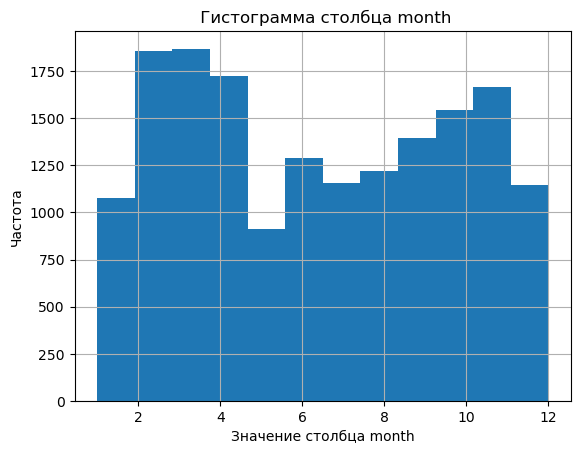

In [118]:
create_hist('month', 12, False)

По гистограмме видим, что меньше всего объявлений публикуют в мае, январе, декабре. Больше всего - в марте

##### Результат удаления выбросов и аномалий

Посчитаем, сколько процентов строк после удаления выбросов осталось от первоначальной выборки.

In [119]:
len(data) / 23699 * 100

71.13802270137981

Было удалено около 28% выбросов и аномалий от общего числа строк.

#### Изучим, как быстро продавались квартиры по столбцу days_exposition

**Построим общую гистограмму для всех городов, показывающую, сколько дней держалось объявление**

In [120]:
calculate_min_max_mode('days_exposition')

Минимальное значение: 1
Максимальное значение: 1580
Мода: 45
Среднее: 147.00759238388991
Медиана: 69.0


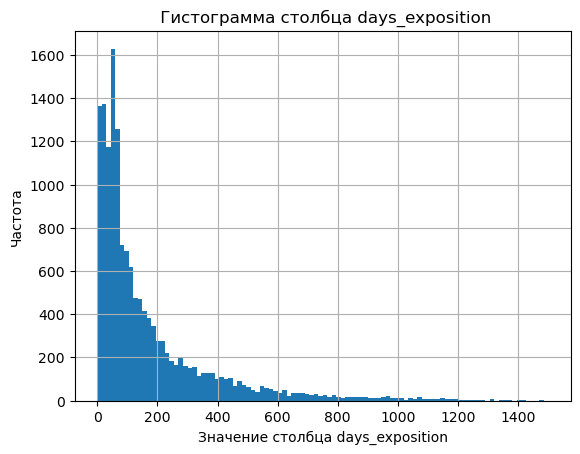

In [121]:
create_hist('days_exposition', 100, True, 0, 1500)

Чаще всего объявление держится около 45 дней. Продажей, совершенной до 44 дней можно считать быстрой. Видим длинный хвост справа. Построим боксплот и посчитаем выбросы

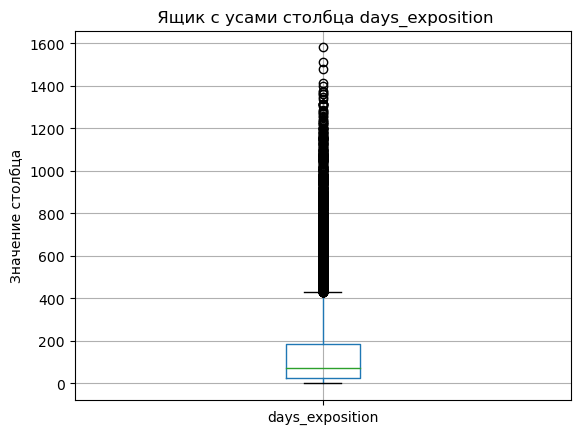

In [122]:
create_boxplot('days_exposition')

Видим выбросы перед верхним усом. Приблизим график.

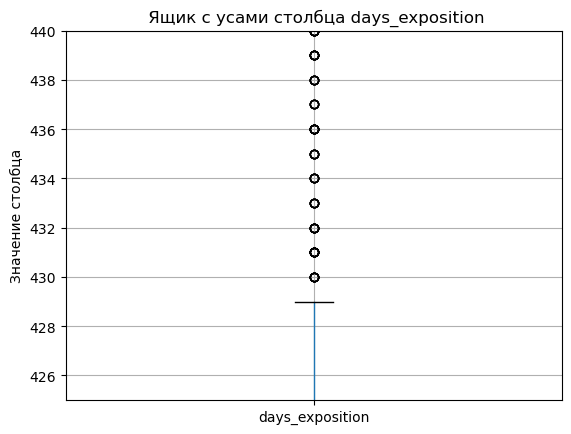

In [123]:
create_boxplot('days_exposition', True, 425, 440)

Выбросами являются значения от 430 дней. Такие продажи можно считать необычайно долгими. Посчитаем их количество

In [142]:
calculate_ejection(data[data['days_exposition'] >= 430])

Количество выбросов от общего количества строк: 8.68%


Выбросы удалять не будем, чтобы не потерять важную информацию в других столбцах, тем более что сам столбец является характеристикой анкеты, а не самой квартиры.

**Вычислим среднюю и медиану**

In [125]:
print('Медиана столбца days_exposition', data['days_exposition'].median())
print('Среднее столбца days_exposition', data['days_exposition'].mean())

Медиана столбца days_exposition 69.0
Среднее столбца days_exposition 147.00759238388991


Среднее - 147 дней. Медиана - 69 дня. Видим, что разница большая, из-за наличия большого количества выбросов.

#### Выясним, какие факторы больше всего влияют на общую (полную) стоимость объекта.

Создадим функцию построения графика зависимости

In [126]:
def create_graph(index, values, title, style, alpha):
    data.pivot_table(index = index, values = values).plot(grid=True, style=style, alpha = alpha)
    plt.title(title)
    plt.xlabel(f'{index}')
    plt.ylabel(f'{values}');

##### Зависимость цены от полной площади

**Построим график зависимости цены от полной площади**

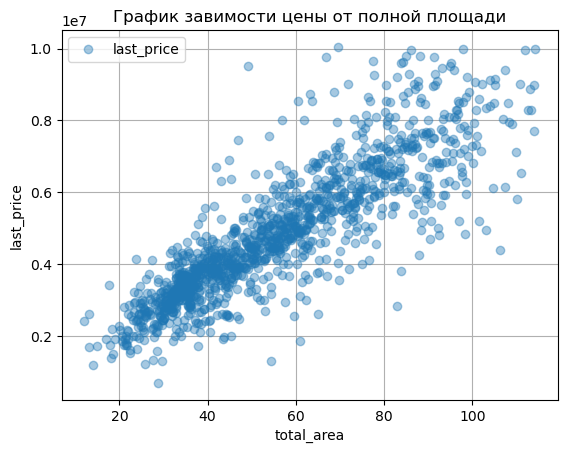

In [127]:
create_graph('total_area', 'last_price', 'График завимости цены от полной площади', 'o', 0.4)

По мере увеличения размера полной площади, цена ожидаемо растёт

**Вычислим корреляцию между ценой и полной площадью**

In [128]:
data['last_price'].corr(data['total_area'])

0.6322912169464311

Корреляция показывает, что увеличение одного показателя значительно влияет на повышение второго

##### Зависимость цены от жилой площади

**Построим график зависимости цены от жилой площади**

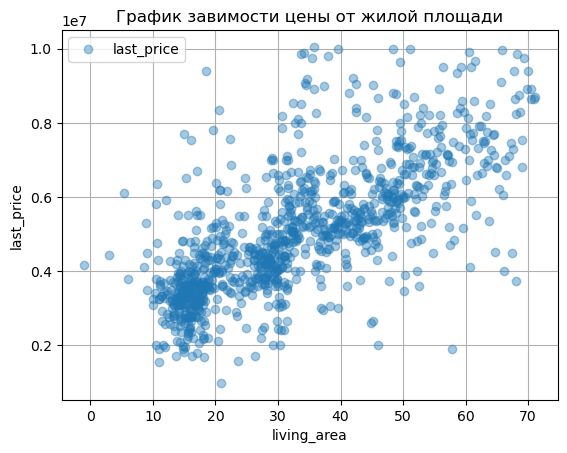

In [129]:
create_graph('living_area', 'last_price', 'График завимости цены от жилой площади', 'o', 0.4)

По мере увеличения размера жилой площади, цена ожидаемо растёт

**Вычислим корреляцию между ценой и жилой площадью**

In [130]:
data['last_price'].corr(data['living_area'])

0.41213483359261643

Корреляция показывает, что увеличение первого показателя влияет на повышение второго. Но жилая площаль влияет меньше чем полная площадь (на 12 % меньше).

##### Зависимость цены от площади кухни

**Построим график зависимости цены от площади кухни**

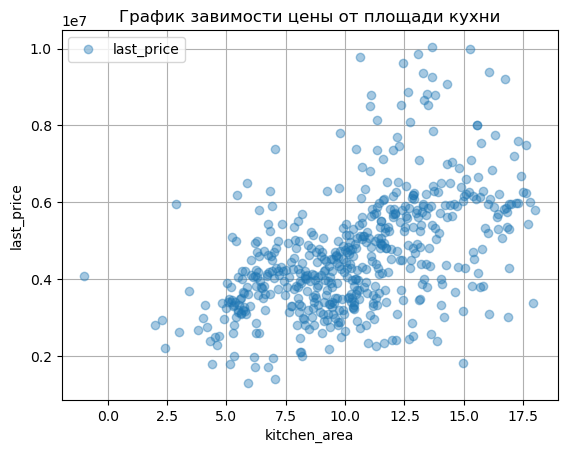

In [131]:
create_graph('kitchen_area', 'last_price', 'График завимости цены от площади кухни', 'o', 0.4)

По мере увеличения размера площади кухни, цена ожидаемо растёт

**Вычислим корреляцию между ценой и площадью кухни**

In [132]:
data['last_price'].corr(data['kitchen_area'])

0.3079289665824806

Корреляция показывает, что увеличение первого показателя влияет на повышение второго. Но площадь кухни влияет меньше чем полная площадь (примерно на 33% меньше).

##### Зависимость цены от количества комнат

**Построим график зависимости цены от количества комнат**

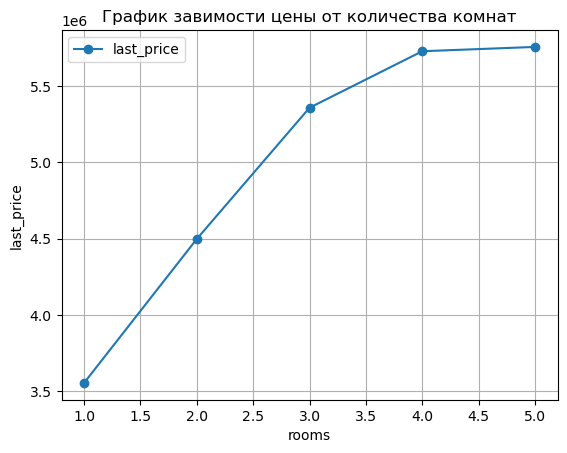

In [133]:
create_graph('rooms', 'last_price', 'График завимости цены от количества комнат', 'o-', 1)

По мере увеличения количества комнат, цена ожидаемо растёт.

**Вычислим корреляцию между ценой и количеством комнат**

In [134]:
data['last_price'].corr(data['rooms'])

0.4045978852661826

Корреляция показывает, что увеличение первого показателя влияет на повышение второго.

##### Зависимость цены от типа этажа

**Построим график зависимости цены от типа этажа**

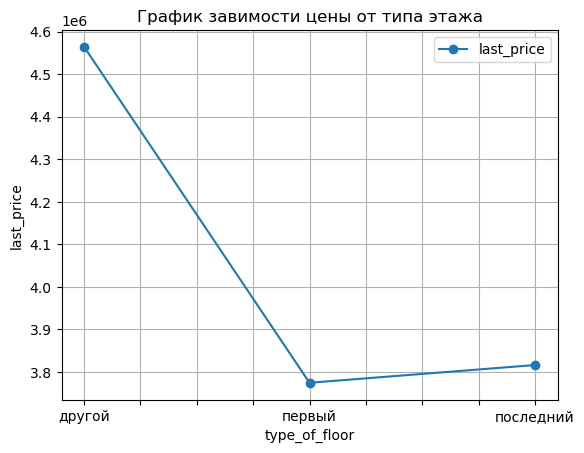

In [135]:
create_graph('type_of_floor', 'last_price', 'График завимости цены от типа этажа', 'o-', 1)

График показывает, что самая высокая средняя цена у недвижимости, который имеет тип "Другой". Меньшую цену имеет недвижимость на последнем этаже. Самая низкая средняя цена у недвижимости на первом этаже.

##### Зависимость цены от месяца публикации объявления

**Построим график зависимости цены от месяца публикации объявления**

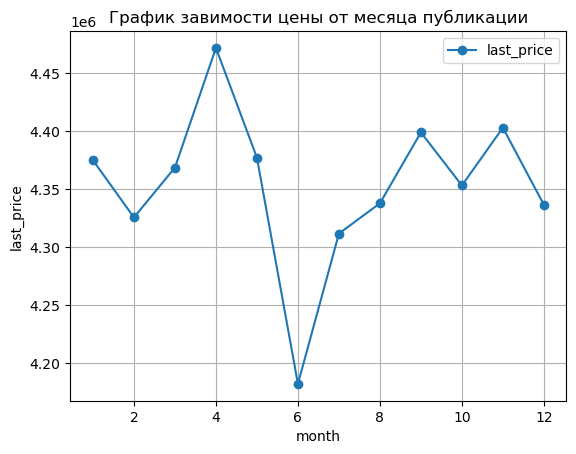

In [136]:
create_graph('month', 'last_price', 'График завимости цены от месяца публикации', 'o-', 1)

На момент публикации согласно графику, самую высокую цену в среднем ставят в апреле, самую низкую - в июне.

##### Зависимость цены от дня недели публикации объявления

**Построим график зависимости цены от дня недели публикации объявления**

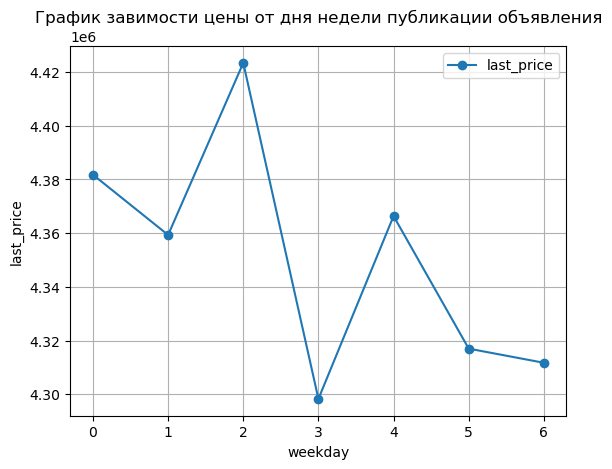

In [137]:
create_graph('weekday', 'last_price', 'График завимости цены от дня недели публикации объявления', 'o-', 1)

Согласно графику, самую высокую цену ставят в объявляениях, опубликованных в среду. Самую низкую цену - в четверг.

##### Зависимость цены от года публикации объявления

**Построим график зависимости цены от года публикации объявления**

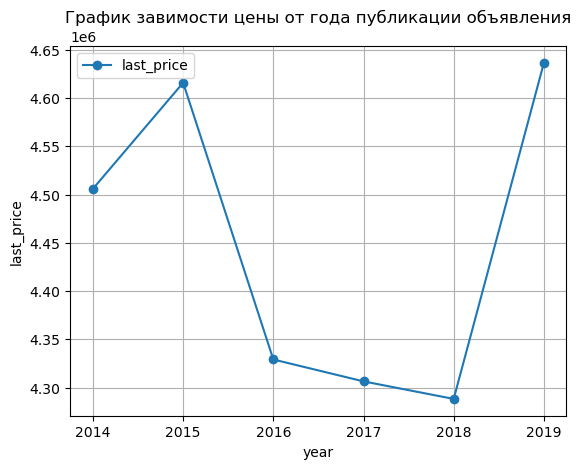

In [138]:
create_graph('year', 'last_price', 'График завимости цены от года публикации объявления', 'o-', 1)

Согласно графику, с 2015 года цены в публикациях постепенно снижались до 2018 года. 2019 год единственный, когда цена начала повышаться

#### Зависимость полной площади от года публикации 

**Построим график зависимости площади квартиры от года публикации объявления**

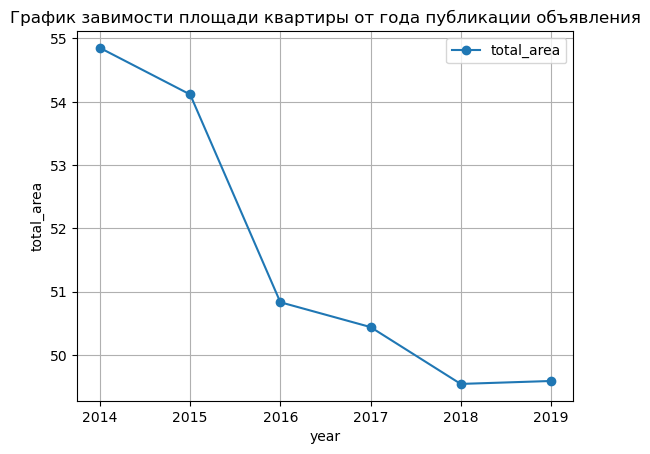

In [139]:
create_graph('year', 'total_area', 'График завимости площади квартиры от года публикации объявления', 'o-', 1)

По графику видно, что ежегодно средняя площадь продаваемых квартир постепенно уменьшалась. Это является важным фактором ежегодного снижения цены, который виден на предыдущем графике.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [140]:
agg_func_math = {'locality_name':'count', 'price_of_1_metre':'mean'}
bb = data.groupby('locality_name').agg(agg_func_math)
bb = bb.rename(columns={'locality_name': 'Количество'})
bb = bb.sort_values(by='Количество', ascending=False)
bb.head(10)

,Количество,price_of_1_metre
locality_name,,
Санкт-Петербург,10139,102286.977961
Мурино,447,85244.565901
поселок Шушары,366,78262.737141
Кудрово,342,95308.097383
Всеволожск,338,66353.167596
Колпино,306,75419.064721
Пушкин,281,99254.047846
Гатчина,277,68421.820832
поселок Парголово,223,89086.990296


Самая высокая стоимость за кв.м в Санкт-Петербурге - 102286.977961

Самая низкая стоимость за кв.м в городе Выборг - 57261.498425

#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра

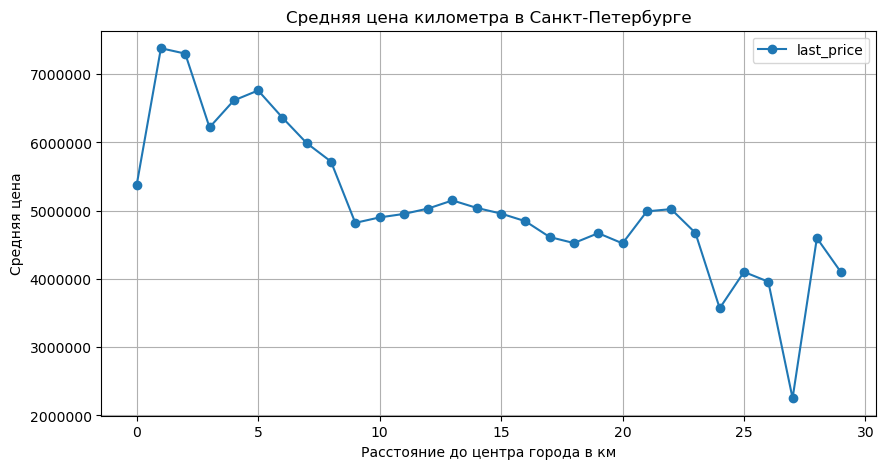

In [141]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
    .plot(grid=True, 
          style='o-', 
          figsize=(10, 5), 
          title = 'Средняя цена километра в Санкт-Петербурге',
          xlabel = 'Расстояние до центра города в км',
          ylabel = 'Средняя цена'
          )
)


plt.ticklabel_format(style='plain')
plt.show()

По графику видно, что по мере удалённости от центра города, стоимость жилья постепенно падает.

#### Вывод по разделу

Были изучены 15 столбцов. Были построены гистограммы, диаграммы размаха, вычислены агрегирующие функции. Было удалено около 28% выбросов и аномалий от общего числа строк. 

Были изучены зависимости цены от восьми показателей, были построены соответствующие графики, вычислена корреляция. Анализ ожидаемо показал, что цена растёт с увеличением полной площади, жилой площади, количества комнат. 

Квартиры на первом и последнем этаже как правило являются самами дешевыми по цене. 

На момент публикации согласно графику зависимости цены от месяца публикации, самую высокую цену в среднем ставят в апреле, самую низкую - в июне. 

Согласно графику зависимости цены от дня недели публикации объявления, самую высокую цену ставят в объявляениях, опубликованных в среду. Самую низкую цену - в четверг.

Согласно график зависимости цены от года публикации объявления, с 2015 года цены в публикациях постепенно снижались до 2018 года. 2019 год единственный, когда цена начала повышаться Как показал дальнейший анализ, важным фактором снижения цены было то, что с каждым годом уменьшалась общая площадь продаваемых квартир.

Была посчитана среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая стоимость за кв.м в Санкт-Петербурге - 102286.977961. Самая низкая стоимость за кв.м в городе Выборг - 57261.498425

Последним анализом было выделение квартир из Питера и расчет их средней цены в зависимости от удаления от центра города. Результат ожидаемо показал, что чем дальше квартира от центра - тем она дешевле.

### Общий вывод

Данное исследование было проведено с целью: найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Входные данные предоставлены сервисом Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**1 Загрузка данных**

Для работы с проектом были импортированы следующие библиотеки:

    matplotlib
    pandas 
    numpy 
   
База содержит 22 столбца и 23699 строк.

    ceiling_height (Высота потолков) 
    floors_total (всего этажей в доме)
    living_area (жилая площадь в квадратных метрах)
    is_apartment (апартаменты)
    kitchen_area (площадь кухни в квадратных метрах)
    balcony (число балконов)
    locality_name (название населённого пункта)
    airports_nearest - (расстояние до ближайшего аэропорта в метрах (м)) 
    cityCenters_nearest (расстояние до центра города (м))
    parks_around3000 (число парков в радиусе 3 км)
    parks_nearest (расстояние до ближайшего парка (м))
    ponds_around3000 (число водоёмов в радиусе 3 км)
    ponds_nearest (расстояние до ближайшего водоёма (м))
    days_exposition (сколько дней было размещено объявление (от публикации до снятия))
  
Были выведены в одно окно гистограммы для столбцов, которые имеют значения float и int. Практически на всех гистограммах видны выбросы. Возможно есть аномальные значения. Необходимо будет их найти, посчитать количество, и решить, что с ними делать.

**2 Предобработка данных**

При предобработке данных были найдены пропуски в 14 столбцах. Они найдены как и в столбцах, которые заполняются вручную пользователем, так и в тех, котрые заполняются автоматически. Пропуски были заполнены везде кроме столбца 'is_apartment'

Были преобразованы типы данных в следующих столбцах: first_day_exposition, balcony, floors_total, is_apartment, days_exposition

Были обработаны неявные дубликаты в столбце locality_name.

Была проведена проверка на явные дубликаты, они отсутствуют.

**3 Добавление новых столбцов**

В таблицу были добавлены новые столбцы:

    'price_of_1_metre' - цена за 1 метр объекта
    'weekday' - день недели публикации объявления
    'month' - месяц публикации объявления
    'year' -  год публикации объявления
    'cityCenters_nearest_km' - удаленность от центра города в километра

**4 Исследовательский анализ данных**

Были изучены 15 столбцов. Были построены гистограммы, диаграммы размаха, вычислены агрегирующие функции. Было удалено около 28% выбросов и аномалий от общего числа строк.

Были изучены зависимости цены от восьми показателей, были построены соответствующие графики, вычислена корреляция. Анализ ожидаемо показал, что цена растёт с увеличением полной площади, жилой площади, количества комнат.

Квартиры на первом и последнем этаже как правило являются самами дешевыми по цене.

На момент публикации согласно графику зависимости цены от месяца публикации, самую высокую цену в среднем ставят в апреле, самую низкую - в июне.

Согласно графику зависимости цены от дня недели публикации объявления, самую высокую цену ставят в объявляениях, опубликованных в среду. Самую низкую цену - в четверг.

Согласно график зависимости цены от года публикации объявления, с 2015 года цены в публикациях постепенно снижались до 2018 года. 2019 год единственный, когда цена начала повышаться Как показал дальнейший анализ, важным фактором снижения цены было то, что с каждым годом уменьшалась общая площадь продаваемых квартир.

Была посчитана среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая стоимость за кв.м в Санкт-Петербурге - 102286.977961. Самая низкая стоимость за кв.м в городе Выборг - 57261.498425

Последним анализом было выделение квартир из Питера и расчет их средней цены в зависимости от удаления от центра города. Результат ожидаемо показал, что чем дальше квартира от центра - тем она дешевле.